In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

from tqdm import tqdm_notebook 

In [2]:
loan_result = pd.read_csv("loan_result.csv")
log_data = pd.read_csv("log_data.csv")
user_spec = pd.read_csv("user_spec.csv")

## 1. 대출상품결과(loan_result)

In [3]:
loan_result

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN
...,...,...,...,...,...,...,...
13527358,1428218,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN
13527359,1428218,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN
13527360,1428218,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN
13527361,1428218,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN


In [4]:
#loan_limit, loan_rate NA 존재함
loan_result.isna().sum()

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                  7495
loan_rate                   7495
is_applied               3257239
dtype: int64

In [5]:
# 두 변수 모두 결측인 값 7495개
loan_result[(loan_result["loan_limit"].isna()) & (loan_result["loan_rate"].isna())]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
461,1029177,2022-06-07 15:29:06,51,21,NaN,NaN,NaN
4318,1086409,2022-06-07 18:11:31,13,262,NaN,NaN,NaN
6971,1193826,2022-06-07 17:13:03,1,202,NaN,NaN,NaN
8459,447492,2022-06-07 17:12:08,30,232,NaN,NaN,NaN
9220,260060,2022-06-07 11:45:43,30,85,NaN,NaN,NaN
...,...,...,...,...,...,...,...
13521728,1222550,2022-06-03 16:51:24,13,262,NaN,NaN,NaN
13522701,135727,2022-06-03 10:59:08,10,149,NaN,NaN,NaN
13523316,687402,2022-06-03 12:12:31,1,102,NaN,NaN,NaN
13523827,621491,2022-06-03 17:05:01,51,21,NaN,NaN,NaN


In [6]:
# 그 중에 대출 신청 여부도 결측인 비율 23%
loan_result[loan_result["loan_limit"].isna()]["is_applied"].isna().mean()

0.2344229486324216

In [7]:
#중복 데이터 존재 -> 제거해야할듯
loan_result[loan_result.duplicated()]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
1507095,2160853,2022-06-16 09:47:23,10,65,29000000.0,15.6,NaN
2292642,662921,2022-06-14 12:20:50,10,65,19000000.0,15.6,NaN
2453028,361861,2022-03-10 09:16:08,10,65,36000000.0,12.2,1.0
2656633,124917,2022-03-01 18:41:01,10,65,50000000.0,12.2,1.0
3026732,893666,2022-06-21 10:34:14,10,65,34000000.0,12.7,NaN
3081480,1008438,2022-06-21 14:50:56,22,221,3000000.0,18.4,NaN
3681411,176009,2022-03-14 15:04:55,10,65,31000000.0,12.2,1.0
5455325,424582,2022-06-13 10:56:40,10,65,43000000.0,14.2,NaN
5550899,707257,2022-06-27 09:03:12,10,65,50000000.0,12.7,NaN
6231370,43839,2022-03-22 13:10:59,10,65,28000000.0,12.5,1.0


### is_applicated : NA

In [8]:
loan_result["is_applied"].isna().mean()

0.24078891059550928

In [9]:
# is_applied가 결측인 행 -> test 데이터
# 6월1일 ~ 6월30일

print(loan_result[loan_result["is_applied"].isna()]["loanapply_insert_time"].min())
print(loan_result[loan_result["is_applied"].isna()]["loanapply_insert_time"].max())

2022-06-01 00:12:24
2022-06-30 23:55:00


In [10]:
# is_applied가 결측이 아닌 행 -> train 데이터
# 3월1일 ~ 5월31일

print(loan_result[-loan_result["is_applied"].isna()]["loanapply_insert_time"].min())
print(loan_result[-loan_result["is_applied"].isna()]["loanapply_insert_time"].max())

2022-03-01 00:11:36
2022-05-31 23:54:38


## 2. 유저로그데이터(log_data)

In [11]:
log_data

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25
...,...,...,...,...,...,...
17843988,242442,StartLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
17843989,242442,EndLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
17843990,593062,OpenApp,2022-05-27 16:19:10,Android,3.13.0,2022-05-27
17843991,593062,Login,2022-05-27 16:19:15,Android,3.13.0,2022-05-27


In [12]:
log_data.isna().sum()

user_id                0
event                  0
timestamp              0
mp_os                980
mp_app_version    660597
date_cd                0
dtype: int64

## 3. 유저스펙테이블(user_spec)

In [13]:
user_spec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN
1394212,1327066,151422,1955.0,1.0,2022-03-22 01:19:24,980.0,20000000.0,OTHERINCOME,NaN,기타,자가,50000000.0,생활비,NaN,NaN,1.0,NaN
1394213,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,EARNEDINCOME,200908.0,정규직,자가,100000000.0,대환대출,NaN,NaN,8.0,200000000.0
1394214,1482466,766546,1975.0,1.0,2022-03-22 22:12:35,640.0,50000000.0,EARNEDINCOME,201705.0,정규직,자가,10000000.0,대환대출,NaN,NaN,10.0,117000000.0


In [14]:
# 결측값이 매우 많음
user_spec.isna().sum()

application_id                               0
user_id                                      0
birth_year                               12961
gender                                   12961
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

In [15]:
# 데이터 전체 행 수 : 1,394,216
len(user_spec)

1394216

In [16]:
# application_id(신청서) 수 : 1,394,216 ( == 데이터 전체 행 수)
len(user_spec["application_id"].unique())

1394216

In [17]:
# user_id(이용자) 수 : 405,213
## 평균적으로 이용자 한 명당 약 3번 정도 핀다 신청을 함
len(user_spec["user_id"].unique())

405213

#### loan_result의 "application_id"와 user_spec의 "application_id"를 기준으로 merge

loan_resul에는 있지만 user_spec에는 없는 경우

In [18]:
tmp = pd.merge(loan_result,user_spec, how='left',on='application_id')

In [19]:
# 이 중에서 user_id가 결측인 값 => loan_result에 있는 application_id가 user_spec에는 없었다. 113개
# user에 대한 정보를 얻을 수 없다면 제거하는게 적절하다고 봄.
tmp[tmp["user_id"].isna()]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
68010,2015764,2022-04-29 15:16:36,27,193,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615673,1669381,2022-03-01 18:03:44,14,197,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1694465,351899,2022-04-18 14:00:08,1,61,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2978297,1382876,2022-03-01 18:02:54,14,197,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3125384,2061284,2022-05-04 10:03:07,1,61,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13373186,197821,2022-03-02 10:29:03,13,262,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13386339,398321,2022-03-02 15:17:30,10,149,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13387297,1872250,2022-03-02 11:01:23,34,57,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13403453,2052437,2022-03-02 17:24:59,30,121,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# 113개 전부 대출 신청한 상품임
tmp[tmp["user_id"].isna()]["is_applied"].sum()

113.0

user_spec에는 있지만 loan_resul에는 없는 경우

In [21]:
tt = pd.DataFrame()
tt["application_id"] = loan_result["application_id"].unique()
tt["dong"] = 1

tmp = pd.merge(user_spec,tt, how='left',on='application_id')

(tmp["dong"].isna()).sum()

425463

## user_spec EDA

In [22]:
user_spec.isna().sum()

application_id                               0
user_id                                      0
birth_year                               12961
gender                                   12961
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

In [23]:
user_spec0 = user_spec.copy()
user_spec = user_spec0.copy()

#### 날짜 형식 맞춰주기

In [24]:
# company_enter_month
company_enter_month_d = []
for i in tqdm_notebook(user_spec["company_enter_month"].astype(str)):
    try:
        company_enter_month_d.append(pd.to_datetime(i[0:6]+"01"))
    except:
        company_enter_month_d.append(np.nan)

<ipython-input-24-ea4bc05fa1fd>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(user_spec["company_enter_month"].astype(str)):


  0%|          | 0/1394216 [00:00<?, ?it/s]

In [25]:
user_spec["company_enter_month"] = company_enter_month_d

In [26]:
# insert_time
user_spec["insert_time"] = pd.to_datetime(user_spec["insert_time"])

#### 개인정보 결측

In [27]:
#income_type, employment_type, houseown_type, desired_amount, purpose 결측 85개
#yearly_income 결측 85개
user_info_na = user_spec[(user_spec["income_type"].isna()) & (user_spec["employment_type"].isna()) & 
         (user_spec["houseown_type"].isna()) & (user_spec["desired_amount"].isna()) & 
                (user_spec["purpose"].isna()) & (user_spec["yearly_income"].isna())]
user_info_na

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
5353,129515,135984,1974.0,1.0,2022-06-13 18:26:44,750.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,4.0,67000000.0
8864,1468193,151012,1996.0,1.0,2022-06-16 16:34:35,810.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6000000.0
17484,1234909,596908,1996.0,0.0,2022-06-16 16:28:10,640.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,3.0,36000000.0
17552,1068316,142003,1976.0,0.0,2022-06-16 16:28:59,770.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20510,2082836,827892,1993.0,1.0,2022-06-16 16:30:46,940.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,3.0,61000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360335,450732,387671,1965.0,1.0,2022-06-16 16:30:17,650.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6000000.0
1363322,657920,839689,1995.0,1.0,2022-06-16 16:31:02,770.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,4.0,16000000.0
1367643,596953,264147,1984.0,1.0,2022-06-30 16:32:56,630.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1000000.0
1378239,999720,738199,1972.0,1.0,2022-03-12 21:49:37,520.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2000000.0


위의 85개 경우는 전부 loan_result에 없는 application_id 이다.

In [28]:
app = user_info_na["application_id"]

In [29]:
l_list = []
for i in app:
    l_list.append(len(loan_result[loan_result["application_id"] == i]))

In [30]:
np.unique(l_list)

array([0])

yearly_income만 결측

In [31]:
# yearly_income만 결측인 값 5개
user_spec[(-user_spec["purpose"].isna()) & (user_spec["yearly_income"].isna())]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
165422,1026915,861363,1995.0,1.0,2022-06-30 21:11:51,NaN,NaN,OTHERINCOME,NaT,기타,전월세,5000000.0,생활비,0.0,0.0,NaN,NaN
233316,2045613,702899,1995.0,1.0,2022-06-30 18:37:04,520.0,NaN,FREELANCER,2022-06-01,기타,전월세,5000000.0,전월세보증금,0.0,0.0,1.0,1000000.0
597591,391560,329226,1996.0,0.0,2022-06-30 19:27:28,590.0,NaN,OTHERINCOME,NaT,기타,전월세,20000000.0,생활비,0.0,0.0,9.0,27000000.0
597613,341149,670502,1981.0,1.0,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,NaT,기타,기타가족소유,6000000.0,사업자금,0.0,0.0,1.0,3000000.0
971960,1330905,771592,2003.0,1.0,2022-06-30 18:57:05,750.0,NaN,OTHERINCOME,NaT,기타,자가,3000000.0,생활비,0.0,0.0,1.0,3000000.0


In [32]:
tmp["insert_time"].max()

'2022-06-30 23:58:29'

In [33]:
user_spec[(-user_spec["purpose"].isna()) & (-user_spec["yearly_income"].isna())]["insert_time"].max()

Timestamp('2022-06-30 23:58:29')

#### 신용점수

In [34]:
tmp = user_spec[user_spec["credit_score"].isna()]
tmp

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
25,272600,754046,1980.0,1.0,2022-06-07 19:24:28,NaN,22000000.0,EARNEDINCOME,2009-01-01,정규직,전월세,22000000.0,대환대출,0.0,NaN,NaN,NaN
39,246114,470525,1983.0,1.0,2022-06-07 22:00:53,NaN,45000000.0,OTHERINCOME,NaT,기타,전월세,30000000.0,사업자금,0.0,NaN,1.0,NaN
48,612258,59149,1998.0,1.0,2022-06-07 07:31:21,NaN,0.0,PRIVATEBUSINESS,2022-03-01,기타,전월세,1000000.0,생활비,0.0,0.0,NaN,NaN
64,1036265,558745,1986.0,0.0,2022-06-07 17:20:08,NaN,48000000.0,EARNEDINCOME,2012-10-01,정규직,자가,280000000.0,주택구입,0.0,NaN,NaN,NaN
65,1930194,157472,1995.0,1.0,2022-06-07 16:34:09,NaN,40000000.0,EARNEDINCOME,2022-05-01,정규직,기타가족소유,7000000.0,생활비,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394120,1281112,493197,1987.0,1.0,2022-03-22 12:06:34,NaN,100000000.0,PRIVATEBUSINESS,2021-10-01,정규직,기타가족소유,50000000.0,사업자금,NaN,NaN,NaN,NaN
1394127,1121565,82805,1992.0,1.0,2022-03-22 11:42:39,NaN,30000000.0,EARNEDINCOME,2018-01-01,정규직,전월세,10000000.0,LIVING,NaN,NaN,NaN,NaN
1394141,1229782,250565,1989.0,1.0,2022-03-22 21:12:37,NaN,44000000.0,EARNEDINCOME,2018-04-01,정규직,전월세,20000000.0,기타,NaN,NaN,NaN,NaN
1394179,1264282,10298,1999.0,1.0,2022-03-22 14:31:24,NaN,10000000.0,FREELANCER,2021-06-01,기타,기타가족소유,3000000.0,전월세보증금,NaN,NaN,NaN,NaN


In [35]:
tmp.value_counts("employment_type")

employment_type
정규직    63748
기타     32630
계약직     7690
일용직     1044
dtype: int64

#### income_type, employment_type, houseown_type 비율

In [36]:
user_spec["income_type"].value_counts()

EARNEDINCOME       892579
OTHERINCOME        172600
PRIVATEBUSINESS    126108
FREELANCER         103913
EARNEDINCOME2       78806
PRACTITIONER        20125
Name: income_type, dtype: int64

In [37]:
user_spec["employment_type"].value_counts()

정규직    918032
기타     345801
계약직    111445
일용직     18853
Name: employment_type, dtype: int64

In [38]:
user_spec["houseown_type"].value_counts()

전월세       642838
기타가족소유    465893
자가        283454
배우자         1946
Name: houseown_type, dtype: int64

In [39]:
user_spec["purpose"].value_counts()

생활비             866079
대환대출            353794
사업자금             62115
기타               30132
전월세보증금           27236
주택구입             17471
LIVING           15432
투자               12532
자동차구입             3394
SWITCHLOAN        3248
BUSINESS           935
ETC                593
HOUSEDEPOSIT       562
BUYHOUSE           307
INVEST             166
BUYCAR             135
Name: purpose, dtype: int64

In [40]:
user_spec[user_spec["purpose"] == "자동차구입"]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
526,2051119,274384,1995.0,0.0,2022-06-07 21:02:00,580.0,40000000.0,EARNEDINCOME,2021-03-01,정규직,전월세,20000000.0,자동차구입,0.0,0.0,1.0,4000000.0
582,596302,320993,2001.0,1.0,2022-06-07 20:53:31,NaN,42000000.0,FREELANCER,2021-11-01,기타,기타가족소유,4000000.0,자동차구입,NaN,NaN,NaN,NaN
771,1800061,684065,1997.0,1.0,2022-05-05 00:40:01,590.0,20000000.0,PRACTITIONER,2022-03-01,일용직,기타가족소유,3000000.0,자동차구입,0.0,NaN,3.0,15000000.0
778,622314,75657,1985.0,1.0,2022-05-05 22:13:23,870.0,25000000.0,EARNEDINCOME,2021-03-01,정규직,기타가족소유,10000000.0,자동차구입,0.0,0.0,1.0,0.0
882,1929925,362989,1997.0,1.0,2022-04-24 20:55:47,840.0,36000000.0,EARNEDINCOME2,2021-11-01,계약직,전월세,16000000.0,자동차구입,0.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392967,1030211,576750,1974.0,1.0,2022-03-21 18:53:16,750.0,10000000.0,OTHERINCOME,NaT,기타,전월세,40000000.0,자동차구입,NaN,NaN,NaN,NaN
1393192,42575,834644,1990.0,0.0,2022-03-04 14:02:44,540.0,25000000.0,EARNEDINCOME2,2017-10-01,계약직,기타가족소유,25000000.0,자동차구입,NaN,NaN,3.0,19000000.0
1393602,800366,193059,1994.0,0.0,2022-04-27 21:21:55,NaN,26000000.0,EARNEDINCOME,2022-01-01,정규직,기타가족소유,16000000.0,자동차구입,0.0,NaN,NaN,NaN
1393917,1168588,642451,1995.0,1.0,2022-06-26 17:08:52,700.0,60000000.0,PRACTITIONER,2021-06-01,계약직,기타가족소유,20000000.0,자동차구입,0.0,NaN,NaN,NaN


In [41]:
user_spec[user_spec["purpose"] == "BUYCAR"]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
3235,1166745,526389,1974.0,0.0,2022-04-20 00:48:48,670.0,40000000.0,EARNEDINCOME,2015-04-01,정규직,자가,30000000.0,BUYCAR,NaN,NaN,3.0,30000000.0
5738,1356707,678849,1975.0,1.0,2022-04-26 14:08:23,980.0,50000000.0,FREELANCER,2022-01-01,기타,자가,20000000.0,BUYCAR,NaN,NaN,NaN,NaN
22921,742660,129688,1975.0,1.0,2022-04-04 15:48:15,NaN,36000000.0,EARNEDINCOME,2013-01-01,정규직,자가,25000000.0,BUYCAR,NaN,NaN,NaN,NaN
23536,2019370,390166,1991.0,1.0,2022-03-24 07:24:23,NaN,75000000.0,EARNEDINCOME,2013-11-01,정규직,자가,10000000.0,BUYCAR,NaN,NaN,NaN,NaN
23554,412813,481732,1972.0,1.0,2022-03-24 17:23:55,NaN,36000000.0,EARNEDINCOME,2021-12-01,정규직,전월세,10000000.0,BUYCAR,NaN,NaN,2.0,23000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347169,1734729,64817,1998.0,1.0,2022-03-03 20:02:13,NaN,36000000.0,EARNEDINCOME,2021-12-01,계약직,기타가족소유,30000000.0,BUYCAR,NaN,NaN,NaN,NaN
1353361,2111704,381486,1973.0,1.0,2022-05-06 17:44:55,940.0,50000000.0,EARNEDINCOME,2021-08-01,정규직,자가,13000000.0,BUYCAR,NaN,NaN,1.0,NaN
1363225,1283771,297050,1996.0,1.0,2022-05-02 16:56:39,NaN,30000000.0,EARNEDINCOME,2014-09-01,정규직,전월세,20000000.0,BUYCAR,NaN,NaN,NaN,NaN
1371759,101254,799478,1983.0,1.0,2022-05-01 10:46:38,NaN,50000000.0,EARNEDINCOME,2018-08-01,정규직,전월세,30000000.0,BUYCAR,NaN,NaN,NaN,NaN


#### existing_loan_cnt, existing_loan_amt

In [42]:
user_spec[user_spec["existing_loan_cnt"].isna()]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
7,1146166,588743,1992.0,0.0,2022-06-07 17:19:33,750.0,46000000.0,EARNEDINCOME,2015-10-01,정규직,기타가족소유,6000000.0,생활비,0.0,0.0,NaN,NaN
23,1237618,717213,1986.0,1.0,2022-06-07 03:26:54,530.0,51000000.0,EARNEDINCOME,2017-05-01,정규직,전월세,5000000.0,생활비,0.0,0.0,NaN,NaN
25,272600,754046,1980.0,1.0,2022-06-07 19:24:28,NaN,22000000.0,EARNEDINCOME,2009-01-01,정규직,전월세,22000000.0,대환대출,0.0,NaN,NaN,NaN
37,703129,324991,1994.0,0.0,2022-06-07 11:12:24,950.0,0.0,OTHERINCOME,NaT,기타,자가,50000000.0,기타,0.0,NaN,NaN,NaN
48,612258,59149,1998.0,1.0,2022-06-07 07:31:21,NaN,0.0,PRIVATEBUSINESS,2022-03-01,기타,전월세,1000000.0,생활비,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394184,1107103,162983,1978.0,1.0,2022-03-22 12:14:17,750.0,55000000.0,EARNEDINCOME,2014-08-01,정규직,전월세,50000000.0,생활비,NaN,NaN,NaN,NaN
1394203,943512,183117,1996.0,0.0,2022-03-22 16:22:21,710.0,24000000.0,EARNEDINCOME,2022-01-01,정규직,전월세,25000000.0,전월세보증금,NaN,NaN,NaN,NaN
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,OTHERINCOME,NaT,기타,전월세,25000000.0,기타,NaN,NaN,NaN,NaN
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,2021-06-01,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN


In [43]:
user_spec[(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
7,1146166,588743,1992.0,0.0,2022-06-07 17:19:33,750.0,46000000.0,EARNEDINCOME,2015-10-01,정규직,기타가족소유,6000000.0,생활비,0.0,0.0,NaN,NaN
23,1237618,717213,1986.0,1.0,2022-06-07 03:26:54,530.0,51000000.0,EARNEDINCOME,2017-05-01,정규직,전월세,5000000.0,생활비,0.0,0.0,NaN,NaN
25,272600,754046,1980.0,1.0,2022-06-07 19:24:28,NaN,22000000.0,EARNEDINCOME,2009-01-01,정규직,전월세,22000000.0,대환대출,0.0,NaN,NaN,NaN
37,703129,324991,1994.0,0.0,2022-06-07 11:12:24,950.0,0.0,OTHERINCOME,NaT,기타,자가,50000000.0,기타,0.0,NaN,NaN,NaN
48,612258,59149,1998.0,1.0,2022-06-07 07:31:21,NaN,0.0,PRIVATEBUSINESS,2022-03-01,기타,전월세,1000000.0,생활비,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394184,1107103,162983,1978.0,1.0,2022-03-22 12:14:17,750.0,55000000.0,EARNEDINCOME,2014-08-01,정규직,전월세,50000000.0,생활비,NaN,NaN,NaN,NaN
1394203,943512,183117,1996.0,0.0,2022-03-22 16:22:21,710.0,24000000.0,EARNEDINCOME,2022-01-01,정규직,전월세,25000000.0,전월세보증금,NaN,NaN,NaN,NaN
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,OTHERINCOME,NaT,기타,전월세,25000000.0,기타,NaN,NaN,NaN,NaN
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,2021-06-01,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN


In [44]:
user_spec[(-user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]["existing_loan_cnt"].value_counts()

1.0    115218
Name: existing_loan_cnt, dtype: int64

In [45]:
user_spec[user_spec["existing_loan_amt"] == 0]["existing_loan_cnt"].value_counts()

1.0     4636
2.0      409
3.0       68
4.0       11
13.0       3
6.0        1
5.0        1
9.0        1
Name: existing_loan_cnt, dtype: int64

## user_spec 결측치 대체

#### 출생년도, 성별 결측치 대체

In [46]:
for i in tqdm_notebook(user_spec[user_spec["birth_year"].isna()].index):
    user_spec.loc[i,"birth_year"] = user_spec.loc[user_spec["user_id"] == user_spec.loc[i,"user_id"],"birth_year"].mean()
    user_spec.loc[i,"gender"] = user_spec.loc[user_spec["user_id"] == user_spec.loc[i,"user_id"],"gender"].mean()

user_spec.isna().sum()

<ipython-input-46-50dd04275f99>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(user_spec[user_spec["birth_year"].isna()].index):


  0%|          | 0/12961 [00:00<?, ?it/s]

application_id                               0
user_id                                      0
birth_year                                9724
gender                                    9724
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

In [47]:
np.sum(-user_spec["birth_year"].isna()) # 이정도면 na를 보함하여 범주화 해보자

1384492

<AxesSubplot:>

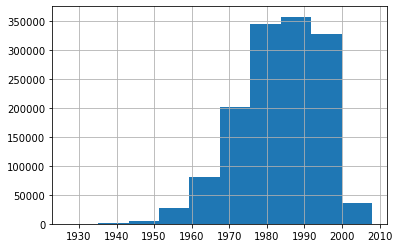

In [48]:
user_spec["birth_year"].hist()

In [49]:
user_spec["only_age"] = 2022 - user_spec["birth_year"]

In [50]:
#만으로 청소년(13~18세) · 청년(19~29세) · 중년(30~49세) · 장년(50~64세) · 노년(65세 이상)

In [51]:
user_spec["cat_age"] =  pd.cut(user_spec["only_age"],[12,18, 29, 49, 64,100], right=False, labels=['청소년', '청년', '중년', '장년', '노년']).astype(object)
user_spec["cat_age"]

0          중년
1          장년
2          청년
3          중년
4          청년
           ..
1394211    청년
1394212    노년
1394213    중년
1394214    중년
1394215    중년
Name: cat_age, Length: 1394216, dtype: object

In [52]:
user_spec.loc[user_spec["cat_age"].isna(),"cat_age"] = "Missing_age"

In [53]:
user_spec["cat_age"].value_counts()

중년             866360
청년             261849
장년             228705
노년              27521
Missing_age      9724
청소년                57
Name: cat_age, dtype: int64

In [54]:
user_spec["cat_gender"] = "Missing_gender"
user_spec.loc[user_spec["gender"] == 1,"cat_gender"] = "남성"
user_spec.loc[user_spec["gender"] == 0,"cat_gender"] = "여성"

In [55]:
user_spec.value_counts(["cat_age","cat_gender"]).reset_index()

,cat_age,cat_gender,0
0,중년,남성,587014
1,중년,여성,279346
2,청년,남성,185929
3,장년,남성,148260
4,장년,여성,80445
5,청년,여성,75920
6,노년,남성,15084
7,노년,여성,12437
8,Missing_age,Missing_gender,9724
9,청소년,남성,41


#### yearly_income (연소득), income_type , employment_type, houseown_type , desired_amount, purpose 결측치 대체

yearly_income 기준 삭제

그 전에 application_id 341149는 loan_result에 존재함.

In [56]:
user_spec[user_spec["user_id"] == 670502]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
566158,1746224,670502,1981.0,1.0,2022-06-30 22:41:11,930.0,0.0,OTHERINCOME,NaT,기타,기타가족소유,6000000.0,사업자금,0.0,0.0,1.0,3000000.0,41.0,중년,남성
597613,341149,670502,1981.0,1.0,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,NaT,기타,기타가족소유,6000000.0,사업자금,0.0,0.0,1.0,3000000.0,41.0,중년,남성


In [57]:
#같은 user의 다른 application을 이용하여 대체, 생성일시를 제외한 모든 조건이 동일하기 때문에 연소득 대체 가능하다고 판단
user_spec.loc[user_spec["application_id"] == 341149, "yearly_income"] = user_spec.loc[user_spec["user_id"] == 670502,"yearly_income"].mean()

In [58]:
user_spec = user_spec[-user_spec["yearly_income"].isna()]

#### 입사년도 결측치 대체

In [59]:
#user_id별로 company_enter_month 종류
user_spec[-user_spec["company_enter_month"].isna()].groupby('user_id')['company_enter_month'].nunique().sort_values(ascending = False)[0:20]

user_id
806361    30
132604    16
783956    13
292140    13
260768    12
634579    12
757883    12
436430    12
196512    11
305961    11
868369    11
591201    11
810420    10
224561    10
111290    10
278556    10
733252    10
23867     10
631410    10
419084     9
Name: company_enter_month, dtype: int64

In [60]:
user_spec[user_spec["user_id"]==806361]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
10051,636369,806361,1973.0,0.0,2022-06-07 06:45:37,660.0,3.000000e+09,FREELANCER,2015-01-01,기타,자가,5000000.0,생활비,0.0,NaN,1.0,NaN,49.0,장년,여성
38391,505409,806361,1973.0,0.0,2022-06-14 15:20:29,660.0,9.500000e+09,EARNEDINCOME2,1997-05-01,정규직,자가,6000000.0,생활비,0.0,NaN,1.0,NaN,49.0,장년,여성
39410,2066460,806361,1973.0,0.0,2022-06-16 10:28:53,660.0,1.000000e+08,OTHERINCOME,NaT,기타,자가,6000000.0,생활비,0.0,NaN,1.0,NaN,49.0,장년,여성
39411,919618,806361,1973.0,0.0,2022-06-16 14:48:04,660.0,9.500000e+08,EARNEDINCOME2,1997-01-01,기타,자가,10000000.0,주택구입,0.0,NaN,1.0,NaN,49.0,장년,여성
39782,901590,806361,1973.0,0.0,2022-04-06 14:59:51,630.0,9.500000e+09,EARNEDINCOME2,2001-01-01,정규직,자가,7000000.0,생활비,NaN,NaN,1.0,NaN,49.0,장년,여성
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930997,1508670,806361,1973.0,0.0,2022-06-07 05:42:26,660.0,8.000000e+09,EARNEDINCOME2,2002-02-01,계약직,자가,35000000.0,사업자금,0.0,NaN,1.0,NaN,49.0,장년,여성
932359,1890131,806361,1973.0,0.0,2022-06-13 11:21:24,660.0,3.000000e+08,OTHERINCOME,NaT,기타,자가,2000000.0,생활비,0.0,NaN,1.0,NaN,49.0,장년,여성
932827,1657879,806361,1973.0,0.0,2022-04-03 18:47:58,630.0,9.600000e+09,EARNEDINCOME2,2003-09-01,일용직,자가,5000000.0,생활비,NaN,NaN,1.0,NaN,49.0,장년,여성
934495,823920,806361,1973.0,0.0,2022-03-21 22:40:09,700.0,9.500000e+08,EARNEDINCOME2,1997-03-01,정규직,자가,35000000.0,대환대출,NaN,NaN,1.0,NaN,49.0,장년,여성


입사년도 종류가 30개인 미친놈 존재

income_type이 기타인 사용자들은 company_enter_month가 NA인 것이 당연함

하지만 그렇지 않은 사용자들은 company_enter_month가 NA인 것이 이상함

In [61]:
user_spec[(user_spec["company_enter_month"].isna()) & (user_spec["income_type"]!="OTHERINCOME")]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
77585,1728563,759028,1962.0,1.0,2022-05-11 16:06:26,600.0,30000000.0,EARNEDINCOME,NaT,정규직,전월세,10000000.0,SWITCHLOAN,NaN,NaN,1.0,15000000.0,60.0,장년,남성
89830,89051,776609,1991.0,0.0,2022-06-02 19:28:01,800.0,2000000.0,EARNEDINCOME,NaT,계약직,전월세,10000000.0,생활비,0.0,0.0,1.0,NaN,31.0,중년,여성
167239,860275,861913,1980.0,0.0,2022-05-02 16:19:56,NaN,21000000.0,EARNEDINCOME,NaT,정규직,전월세,20000000.0,LIVING,NaN,NaN,NaN,NaN,42.0,중년,여성
309603,478904,418233,1985.0,0.0,2022-05-15 17:40:59,690.0,50000000.0,PRIVATEBUSINESS,NaT,기타,전월세,20000000.0,생활비,0.0,0.0,3.0,20000000.0,37.0,중년,여성
411187,597961,851635,1971.0,0.0,2022-03-10 14:27:19,550.0,26000000.0,EARNEDINCOME,NaT,정규직,기타가족소유,20000000.0,LIVING,NaN,NaN,5.0,68000000.0,51.0,장년,여성
645702,978338,418233,1985.0,0.0,2022-04-14 18:52:19,690.0,50000000.0,PRIVATEBUSINESS,NaT,기타,전월세,30000000.0,사업자금,NaN,NaN,3.0,20000000.0,37.0,중년,여성
658794,1024494,418233,1985.0,0.0,2022-05-16 15:28:53,690.0,50000000.0,PRIVATEBUSINESS,NaT,기타,전월세,50000000.0,사업자금,0.0,0.0,3.0,20000000.0,37.0,중년,여성
928074,994477,546184,1981.0,0.0,2022-03-31 10:50:56,NaN,30000000.0,EARNEDINCOME,NaT,정규직,기타가족소유,10000000.0,LIVING,NaN,NaN,3.0,62000000.0,41.0,중년,여성
945656,1401966,776609,1991.0,0.0,2022-05-13 23:15:27,930.0,26000000.0,EARNEDINCOME,NaT,계약직,전월세,10000000.0,생활비,0.0,0.0,1.0,NaN,31.0,중년,여성
1057011,1026844,174784,1998.0,1.0,2022-04-08 15:12:08,NaN,32000000.0,EARNEDINCOME,NaT,정규직,전월세,10000000.0,SWITCHLOAN,NaN,NaN,NaN,NaN,24.0,청년,남성


In [62]:
loan_result[loan_result["application_id"] == 860275]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
11273330,860275,2022-05-02 16:19:58,58,175,11000000.0,14.8,0.0
11273331,860275,2022-05-02 16:19:58,6,36,8000000.0,17.7,0.0
11273332,860275,2022-05-02 16:19:57,51,247,25000000.0,18.9,0.0
11273333,860275,2022-05-02 16:19:58,32,56,5000000.0,17.7,0.0


In [63]:
for i in user_spec[(user_spec["company_enter_month"].isna()) & (user_spec["income_type"]!="OTHERINCOME")]["user_id"]:
    print(i,":", sum(user_spec["user_id"] == i))

759028 : 4
776609 : 2
861913 : 1
418233 : 3
851635 : 1
418233 : 3
418233 : 3
546184 : 2
776609 : 2
174784 : 1


In [64]:
user_spec[user_spec["user_id"] == 759028]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
77585,1728563,759028,1962.0,1.0,2022-05-11 16:06:26,600.0,30000000.0,EARNEDINCOME,NaT,정규직,전월세,10000000.0,SWITCHLOAN,NaN,NaN,1.0,15000000.0,60.0,장년,남성
101410,1176623,759028,1962.0,1.0,2022-04-27 11:45:40,600.0,24000000.0,EARNEDINCOME,2021-10-01,정규직,자가,15000000.0,대환대출,0.0,NaN,1.0,15000000.0,60.0,장년,남성
886336,693346,759028,1962.0,1.0,2022-06-30 11:05:37,580.0,30000000.0,EARNEDINCOME,2021-09-01,정규직,기타가족소유,16000000.0,생활비,0.0,0.0,1.0,15000000.0,60.0,장년,남성
1357869,637591,759028,1962.0,1.0,2022-03-04 15:53:19,NaN,26000000.0,EARNEDINCOME,2021-10-01,정규직,자가,10000000.0,생활비,NaN,NaN,1.0,15000000.0,60.0,장년,남성


In [65]:
for i in user_spec[(user_spec["company_enter_month"].isna()) & (user_spec["income_type"]!="OTHERINCOME")]["application_id"]:
    print(i,":", sum(loan_result["application_id"] == i))

1728563 : 0
89051 : 23
860275 : 4
478904 : 7
597961 : 0
978338 : 9
1024494 : 7
994477 : 0
1401966 : 21
1026844 : 7


소득 종류에 따라 입사년도 결측인 비율이 다름. 기타에 해당하는 주부, 학생은 입사년도가 존재하는 경우도 있음

In [66]:
user_spec[user_spec["company_enter_month"].isna()].value_counts("income_type")

income_type
OTHERINCOME        171662
EARNEDINCOME            7
PRIVATEBUSINESS         3
dtype: int64

In [67]:
aa = user_spec[user_spec["company_enter_month"].isna()]
aa[aa["income_type"]=="EARNEDINCOME"]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
77585,1728563,759028,1962.0,1.0,2022-05-11 16:06:26,600.0,30000000.0,EARNEDINCOME,NaT,정규직,전월세,10000000.0,SWITCHLOAN,NaN,NaN,1.0,15000000.0,60.0,장년,남성
89830,89051,776609,1991.0,0.0,2022-06-02 19:28:01,800.0,2000000.0,EARNEDINCOME,NaT,계약직,전월세,10000000.0,생활비,0.0,0.0,1.0,NaN,31.0,중년,여성
167239,860275,861913,1980.0,0.0,2022-05-02 16:19:56,NaN,21000000.0,EARNEDINCOME,NaT,정규직,전월세,20000000.0,LIVING,NaN,NaN,NaN,NaN,42.0,중년,여성
411187,597961,851635,1971.0,0.0,2022-03-10 14:27:19,550.0,26000000.0,EARNEDINCOME,NaT,정규직,기타가족소유,20000000.0,LIVING,NaN,NaN,5.0,68000000.0,51.0,장년,여성
928074,994477,546184,1981.0,0.0,2022-03-31 10:50:56,NaN,30000000.0,EARNEDINCOME,NaT,정규직,기타가족소유,10000000.0,LIVING,NaN,NaN,3.0,62000000.0,41.0,중년,여성
945656,1401966,776609,1991.0,0.0,2022-05-13 23:15:27,930.0,26000000.0,EARNEDINCOME,NaT,계약직,전월세,10000000.0,생활비,0.0,0.0,1.0,NaN,31.0,중년,여성
1057011,1026844,174784,1998.0,1.0,2022-04-08 15:12:08,NaN,32000000.0,EARNEDINCOME,NaT,정규직,전월세,10000000.0,SWITCHLOAN,NaN,NaN,NaN,NaN,24.0,청년,남성


In [68]:
aa[aa["income_type"]=="PRIVATEBUSINESS"]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
309603,478904,418233,1985.0,0.0,2022-05-15 17:40:59,690.0,50000000.0,PRIVATEBUSINESS,NaT,기타,전월세,20000000.0,생활비,0.0,0.0,3.0,20000000.0,37.0,중년,여성
645702,978338,418233,1985.0,0.0,2022-04-14 18:52:19,690.0,50000000.0,PRIVATEBUSINESS,NaT,기타,전월세,30000000.0,사업자금,NaN,NaN,3.0,20000000.0,37.0,중년,여성
658794,1024494,418233,1985.0,0.0,2022-05-16 15:28:53,690.0,50000000.0,PRIVATEBUSINESS,NaT,기타,전월세,50000000.0,사업자금,0.0,0.0,3.0,20000000.0,37.0,중년,여성


#### personal_rehabilitation_yn, personal_rehabilitation_complete_yn

- 개인 회생자 신청 여부(0:개인회생자 X, 1:개인회생자O)
- 개인 회생 완료 여부(personal_rehabilitation_yn == 1인 사람들 중, 0:납입중, 1:완료)

(0,NA)
(1,0)
(1,1)

In [69]:
print("1,NA :",user_spec[(user_spec["personal_rehabilitation_yn"] == 1) & (user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("1,0 or 1,1 :",user_spec[(user_spec["personal_rehabilitation_yn"] == 1) & (-user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("0,NA :",user_spec[(user_spec["personal_rehabilitation_yn"] == 0) & (user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("0,0 or 0,1 :",user_spec[(user_spec["personal_rehabilitation_yn"] == 0) & (-user_spec["personal_rehabilitation_complete_yn"].isna())].shape)

1,NA : (0, 20)
1,0 or 1,1 : (12709, 20)
0,NA : (615893, 20)
0,0 or 0,1 : (178149, 20)


0,0 or 0,1 는 아마도 개인회생자 여부를 체크 한 후, 다시 해제한 경우일 가능성이 있음!

-> 그렇다면 전부 0, NA로 대체하는 것이 옳음

In [70]:
user_spec.loc[(user_spec["personal_rehabilitation_yn"] == 0) & (-user_spec["personal_rehabilitation_complete_yn"].isna()), "personal_rehabilitation_complete_yn"] = np.nan

In [71]:
print("1,NA :",user_spec[(user_spec["personal_rehabilitation_yn"] == 1) & (user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("1,0 or 1,1 :",user_spec[(user_spec["personal_rehabilitation_yn"] == 1) & (-user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("0,NA :",user_spec[(user_spec["personal_rehabilitation_yn"] == 0) & (user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("0,0 or 0,1 :",user_spec[(user_spec["personal_rehabilitation_yn"] == 0) & (-user_spec["personal_rehabilitation_complete_yn"].isna())].shape)

1,NA : (0, 20)
1,0 or 1,1 : (12709, 20)
0,NA : (794042, 20)
0,0 or 0,1 : (0, 20)


범주화

In [72]:
user_spec["rehabilitation"] = "rehabilitation_not"

In [73]:
user_spec.loc[(user_spec["personal_rehabilitation_yn"] == 1) & (user_spec["personal_rehabilitation_complete_yn"] == 0),"rehabilitation"] = "rehabilitation"
user_spec.loc[(user_spec["personal_rehabilitation_yn"] == 1) & (user_spec["personal_rehabilitation_complete_yn"] == 1),"rehabilitation"] = "rehabilitation_completed"

In [74]:
user_spec["rehabilitation"].value_counts()

rehabilitation_not          1381418
rehabilitation                11361
rehabilitation_completed       1348
Name: rehabilitation, dtype: int64

#### existing_loan_cnt, existing_loan_amt 결측치 대체

existing_loan_cnt, existing_loan_amt가 결측인 행의 유저가 다른 행에서는 결측이 아닌 행이 있는지 확인

In [75]:
n1 = 0
n2 = 0
for i in tqdm_notebook(user_spec[(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]["user_id"]):
    n1 += (len(user_spec[user_spec["user_id"] == i]) != sum(user_spec[user_spec["user_id"] == i]["existing_loan_cnt"].isna()))
    n2 += (len(user_spec[user_spec["user_id"] == i]) != sum(user_spec[user_spec["user_id"] == i]["existing_loan_amt"].isna()))

<ipython-input-75-e6bc07e5f9ce>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(user_spec[(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]["user_id"]):


  0%|          | 0/198539 [00:00<?, ?it/s]

In [76]:
print(n1)
print(n2)

0
0


해당 유저는 기대출이 없는 유저로 판단

추가로 기대출 수는 NA가 아니지만, 기대출 금액은 NA인 행에 대하여 같은 user_id를 가진 행 중에 기대출 금액이 NA가 아닌 행이 존재하는지 확인

In [77]:
n3 = 0
for i in tqdm_notebook(user_spec[-(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]["user_id"]):
    n3 += (len(user_spec[user_spec["user_id"] == i]) != sum(user_spec[user_spec["user_id"] == i]["existing_loan_amt"].isna()))

<ipython-input-77-b1df4c054bbb>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(user_spec[-(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]["user_id"]):


  0%|          | 0/115212 [00:00<?, ?it/s]

In [78]:
print(n3)

0


기대출 횟수와 잔액의 NA여부를 바탕으로 그룹 형성

- 횟수가 0인 경우는 없음
- 잔액이 NA인 경우는 횟수가 NA또는 1
- 잔액이 0인 경우 존재

In [150]:
loan_notna_na = user_spec[-(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]
loan_notna_na.value_counts("existing_loan_cnt")

existing_loan_cnt
1.0    115212
dtype: int64

In [151]:
loan_notna_0 = user_spec[-(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"]==0)]
loan_notna_0.value_counts("existing_loan_cnt")

existing_loan_cnt
1.0     4636
2.0      409
3.0       68
4.0       11
13.0       3
5.0        1
6.0        1
9.0        1
dtype: int64

In [152]:
loan_na_na = user_spec[(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]
loan_na_na["credit_score"].describe()

count    121232.000000
mean        665.470998
std         159.270887
min          60.000000
25%         580.000000
50%         640.000000
75%         750.000000
max        1000.000000
Name: credit_score, dtype: float64

기대출 횟수가 1이고 잔액이 NA이거나, 기대출 횟수가 NA이고 잔액이 NA인 경우는 최저연령이 만 14세

In [141]:
user_spec["only_age"].min()

14.0

In [142]:
loan_notna_0["only_age"].min()

14.0

In [154]:
loan_na_na["only_age"].min()

14.0

기대출 횟수가 NA가 아니지만, 기대출 잔액이 0인 경우는 최저연령이 만 19세이다.

In [153]:
loan_notna_0["only_age"].min()

19.0

In [83]:
user_spec[-(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender,rehabilitation
5,1559350,746993,1994.0,1.0,2022-06-07 09:55:03,600.0,35000000.0,FREELANCER,2016-04-01,기타,...,5000000.0,생활비,0.0,NaN,1.0,NaN,28.0,청년,남성,rehabilitation_not
22,838266,122491,1986.0,1.0,2022-06-07 09:19:10,890.0,50000000.0,EARNEDINCOME,2018-02-01,정규직,...,150000000.0,주택구입,0.0,NaN,1.0,NaN,36.0,중년,남성,rehabilitation_not
26,696416,648540,1965.0,1.0,2022-06-07 11:38:46,750.0,30000000.0,OTHERINCOME,NaT,기타,...,20000000.0,생활비,0.0,NaN,1.0,NaN,57.0,장년,남성,rehabilitation_not
39,246114,470525,1983.0,1.0,2022-06-07 22:00:53,NaN,45000000.0,OTHERINCOME,NaT,기타,...,30000000.0,사업자금,0.0,NaN,1.0,NaN,39.0,중년,남성,rehabilitation_not
50,357600,588826,1987.0,1.0,2022-06-07 11:25:12,650.0,30000000.0,OTHERINCOME,NaT,기타,...,50000000.0,대환대출,0.0,NaN,1.0,NaN,35.0,중년,남성,rehabilitation_not
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394145,431568,676727,1994.0,1.0,2022-03-22 16:08:32,620.0,30000000.0,EARNEDINCOME,2021-08-01,정규직,...,10000000.0,LIVING,NaN,NaN,1.0,NaN,28.0,청년,남성,rehabilitation_not
1394181,1842145,860123,1983.0,1.0,2022-03-22 07:29:37,820.0,70000000.0,EARNEDINCOME,2009-05-01,정규직,...,5000000.0,생활비,NaN,NaN,1.0,NaN,39.0,중년,남성,rehabilitation_not
1394192,1950119,689980,1993.0,0.0,2022-03-22 22:39:13,750.0,30000000.0,EARNEDINCOME2,2022-03-01,계약직,...,1000000.0,생활비,NaN,NaN,1.0,NaN,29.0,중년,여성,rehabilitation_not
1394210,316356,53701,1996.0,1.0,2022-03-22 10:01:38,730.0,60000000.0,PRIVATEBUSINESS,2021-05-01,정규직,...,15000000.0,사업자금,NaN,NaN,1.0,NaN,26.0,청년,남성,rehabilitation_not


In [84]:
user_spec["loan_cnt"] = user_spec["existing_loan_cnt"].copy()
user_spec["loan_amt"] = user_spec["existing_loan_amt"].copy()

In [85]:
user_spec.loc[:,["loan_cnt", "loan_amt"]] = user_spec.loc[:,["loan_cnt", "loan_amt"]].fillna(0)

In [86]:
user_spec.isna().sum()

application_id                               0
user_id                                      0
birth_year                                9723
gender                                    9723
insert_time                                  0
credit_score                            105111
yearly_income                                0
income_type                                  0
company_enter_month                     171672
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn              587376
personal_rehabilitation_complete_yn    1381418
existing_loan_cnt                       198539
existing_loan_amt                       313751
only_age                                  9723
cat_age                                      0
cat_gender                                   0
rehabilitation                               0
loan_cnt     

## 어플 사용자 경우의 수

1. 개인정보 null, log 확인시 complete 이후에 end가 없다면 -> 다른 업무를 위해 어플을 사용할 가능성!

2. 개인정보 null, log 확인시 complete 이후에 end가 있다면 -> 오류일 가능성!

3. 개인정보 not-null, application_id가 loan_result에 있다면 -> 대출받을 사람임!

4. 개인정보 not-null, application_id가 loan_result에 없다면 -> 다른 업무를 위해 어플을 사용할 가능성!

#1,2번
user_info_nan = user_spec[(user_spec["income_type"].isna()) & (user_spec["employment_type"].isna()) & 
         (user_spec["houseown_type"].isna()) & (user_spec["desired_amount"].isna()) & 
                (user_spec["purpose"].isna()) & (user_spec["yearly_income"].isna())][["application_id","user_id"]]

true_index=[]
for i in tqdm_notebook(range(len(tmp))):
    log_tmp = log_data[log_data["user_id"] == user_info_nan.iloc[i,1]]
    user_tmp = user_spec[user_spec["application_id"] == user_info_nan.iloc[i,0]]
    
    true_index.append(log_tmp[(log_tmp["timestamp"].dt.month == user_tmp["insert_time"].dt.month.mean()) & 
    (log_tmp["timestamp"].dt.day == user_tmp["insert_time"].dt.day.mean())]["event"].isin(["EndLoanApply"]).max())

user_info_nan["complete"] = true_index
user_info_nan

#2번에 해당하는 경우
user_info_nan[user_info_nan["complete"] == True].shape

#3,4번
app_tmp = user_spec[(-user_spec["income_type"].isna()) & (-user_spec["employment_type"].isna()) & 
         (-user_spec["houseown_type"].isna()) & (-user_spec["desired_amount"].isna()) & 
                (-user_spec["purpose"].isna()) & (-user_spec["yearly_income"].isna())]["application_id"]

true_index2=[]
for i in tqdm_notebook(app_tmp):
    if len(loan_result[loan_result["application_id"] == i]) == 0:
        true_index2.append(False)
    else:
        true_index2.append(True)


np.mean(true_index2)